# Sistema de Recomendação de Filmes

Sistemas de recomendação melhora dos resultados de pesquisas por gostos do usuário

Esses sistemas podem ser usados para prever e avaliar as nossas preferência, e com isso recomendar itens.

### Vamos começar!

In [1]:
#importando bibliotecas para manipulação de matrizes
import pandas as pd
import numpy as np

#biblioteca ignora alertas
import warnings; warnings.simplefilter('ignore')

In [2]:
#carregamento de dataset
df1 = pd.read_csv('dataset/movies_metadata.csv')
df2 = pd.read_csv('dataset/links_small.csv')

In [3]:
print(df1.shape)
print(df2.shape)

(45466, 24)
(9125, 3)


In [4]:
#Identifiquei que preciso excluir essas instruções, porque estão no formato date
df1 = df1.drop([19730, 29503, 35587])

In [5]:
#Faço os valores aqui no formato int
df1['id'] = df1['id'].astype('int')

#Verifico as dimensões
df1.shape

(45463, 24)

In [6]:
df1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Avaliações do Dataset (Conhecendo o conjunto)
Essa etapa é importante para conhecer o conjunto de dados que deseja trabalhar

In [7]:
#Colunas
print(df1.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [8]:
#Verifica se existem valores missing
print('\n', df1.isnull().values.any())

#Mostra a quantidade de valores nulos por atributo
print(df1.isnull().sum())


 True
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25051
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64


### Visualizações
Fazer fazer algumas visualizações em colunas quantitativas

In [9]:
#Bibliteca para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


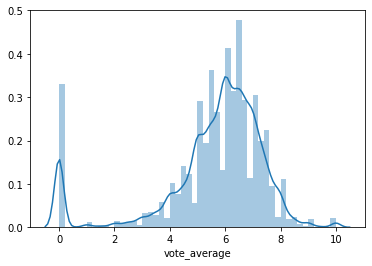

In [10]:
#Histogram da média de votos
sns.distplot(df1['vote_average'])

In [11]:
#Valores únicos 
np.unique(df1['vote_average'])

array([ 0. ,  0.5,  0.7,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
        1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,
        2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,
        4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,
        5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,
        6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,
        7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,
        8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,
        9.5,  9.6,  9.8, 10. ,  nan,  nan,  nan])

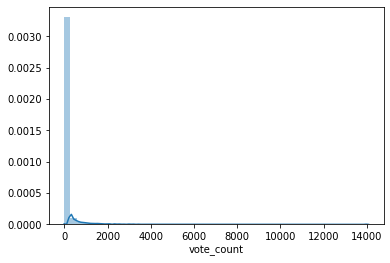

In [12]:
#Histogram da quantidade de avaliações
sns.distplot(df1['vote_count'])

**Conclusão:** É fácil notar com as visualizações que a maioria dos filmes tem avaliações entre 4 a 8,  e a maioria tem entre 0 a 200 votos. (Esses filmes não são relevantes para recomendar)

#### Limpeza de dados

In [13]:
#Biblioteca
from ast import literal_eval

#Limpa e organiza os dados de genres, vote_count e vote_average
df1['genres'] = df1['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df1['vote_count'] = df1[df1['vote_count'].notnull()]['vote_count'].astype('int')
df1['vote_average'] = df1[df1['vote_average'].notnull()]['vote_average'].astype('int')

## Metricas de Avaliação do Filme 
**É nesta etapa que aplicamos aqueles conceitos de processos  estatísticos**

Podemos usar as classificações médias do filme como pontuação, mas usar isso não seria justo, pois um filme com classificação média de 9.1 e apenas 3 votos não pode ser considerado melhor do que o filme com classificação média de 8.7, mas com 40 votos. 

Portanto, para equalizar essa caracteristica usarei a classificação ponderada do IMDb, que é apresenta abaixo:
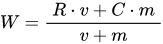
Onde:

W = Classificação ponderada

R  = Média para o filme como um número de 1 a 10 (média) 

v  = Número de votos para o filme 

m  = mínimo de votos necessários para ser listado 

C  = O voto médio em todo o relatório

Fonte:https://pt.qwe.wiki/wiki/IMDb

#### Avaliações dos filmes

In [14]:
#Média de notas dos nossos filmes
print(df1['vote_average'].mean())

#Média de avaliações por filmes
print(df1['vote_count'].mean())

#Média de avaliações por filmes (50%)
print(df1['vote_count'].quantile(0.5))

#Média de avaliações por filmes (75%)
print(df1['vote_count'].quantile(0.75))

#Média de avaliações por filmes (85%)
print(df1['vote_count'].quantile(0.85))

#Média de avaliações por filmes (95%)
print(df1['vote_count'].quantile(0.95))

5.244896612406511
109.89733831940167
10.0
34.0
82.0
434.0


In [15]:
#Média de notas dos nossos filmes
C = df1['vote_average'].mean()
C

5.244896612406511

In [16]:
#Média de avaliações por filmes (95%)
m = df1['vote_count'].quantile(0.95)
m

434.0

In [17]:
qualificados = df1[(df1['vote_count'] >= m) & (df1['vote_count'].notnull()) & (df1['vote_average'].notnull())][['title', 'vote_count', 'vote_average', 'popularity', 'genres']]

In [18]:
qualificados['vote_count'] = qualificados['vote_count'].astype('int')
qualificados['vote_average'] = qualificados['vote_average'].astype('int')
qualificados.shape

(2274, 5)

In [19]:
def imbd(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [20]:
qualificados['wr'] = qualificados.apply(imbd, axis=1)

In [21]:
qualificados = qualificados.sort_values('wr', ascending=False).head(250)

In [22]:
qualificados.head(15)

,title,vote_count,vote_average,popularity,genres,wr
15480,Inception,14075,8,29.1081,"[Action, Thriller, Science Fiction, Mystery, A...",7.917588
12481,The Dark Knight,12269,8,123.167,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,11187,8,32.2135,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,9678,8,63.8696,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,8892,8,32.0707,"[Adventure, Fantasy, Action]",7.871787
292,Pulp Fiction,8670,8,140.95,"[Thriller, Crime]",7.868660
314,The Shawshank Redemption,8358,8,51.6454,"[Drama, Crime]",7.864000
7000,The Lord of the Rings: The Return of the King,8226,8,29.3244,"[Adventure, Fantasy, Action]",7.861927
351,Forrest Gump,8147,8,48.3072,"[Comedy, Drama, Romance]",7.860656
5814,The Lord of the Rings: The Two Towers,7641,8,29.4235,"[Adventure, Fantasy, Action]",7.851924


**The Godfather** e **Forrest Gump** são uns dos melhores filmes que eu já assistir!

**Conclusão:** Terminados as metricas de avalação por títulos, vamos agora para o que nos interessa.

## Sistema de Recomendação

Temos que observar o que seria recomendar um filme?

Recomendar um filme é apresentar caracteristicas que o usuário está acostumado a assistir e apresentar títulos que possuem boas avaliações (métricas)

**Exemplo 1:** 

Eu gosto dos filmes "Home Alone 1" e "Home Alone 2" (Esqueceram de mim 1 e 2), porém eu não gostei dos filmes "Home Alone 3" e "Home Alone 4"


É fácil observar que o filme "Home Alone 1" tem um **enredo** muito parecido com "Home Alone 2" 


**Exemplo 2:**

Metricamente com base no IMBd (visualizado em 24/09/2020)

"Home Alone 1" tem IMBd : 7.6/10

"Home Alone 2" tem IMBd : 6.8/10

"Home Alone 3" tem IMBd : 4.5/10

"Home Alone 4" tem IMBd : 3.3/10

É fácil observar que são os mais bem avaliados.

**Exemplo 3:**

O exemplo abaixo exemplifica bem
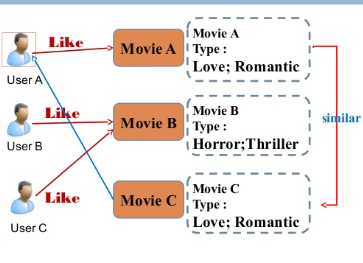

Logo: Podemos calcular pontuações de **similaridade** para todos os filmes com base em suas descrições de enredo e com base nessa pontuação de similaridade.

Abaixo apresenta a formula de similaridade.

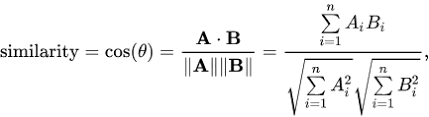

In [23]:
df2 = df2[df2['tmdbId'].notnull()]['tmdbId'].astype('int')

df1['id'] = df1['id'].astype('int')

In [24]:
df = df1[df1['id'].isin(df2)]
df.shape

(9099, 24)

In [25]:
df['tagline'] = df['tagline'].fillna('')
df['description'] = df['overview'] + df['tagline']
df['description'] = df['description'].fillna('')

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [27]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['description'])

In [28]:
tfidf_matrix.shape

(9099, 268124)

In [29]:
from sklearn.metrics.pairwise import linear_kernel

In [30]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [31]:
df = df.reset_index()
titles = df['title']
indices = pd.Series(df.index, index=df['title'])

In [32]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

## Finalmente vamos testar a funcionalidade do sistema

In [33]:
get_recommendations('The Godfather').head(10)

973      The Godfather: Part II
8387                 The Family
3509                       Made
4196         Johnny Dangerously
29               Shanghai Triad
5667                       Fury
2412             American Movie
1582    The Godfather: Part III
4221                    8 Women
2159              Summer of Sam
Name: title, dtype: object

In [34]:
get_recommendations('The Dark Knight Rises').head(10)

132                              Batman Forever
6900                            The Dark Knight
1113                             Batman Returns
2579               Batman: Mask of the Phantasm
524                                      Batman
7565                 Batman: Under the Red Hood
7901                           Batman: Year One
8227    Batman: The Dark Knight Returns, Part 2
6144                              Batman Begins
8165    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

In [35]:
get_recommendations('Star Wars').head(10)

949                          The Empire Strikes Back
962                               Return of the Jedi
8755                    Star Wars: The Force Awakens
6690                                 Shrek the Third
6125    Star Wars: Episode III - Revenge of the Sith
4815                               Where Eagles Dare
7539                             Shrek Forever After
2896                 On Her Majesty's Secret Service
5805                                 The Ice Pirates
515                                 Princess Caraboo
Name: title, dtype: object

Fonte da dataset: https://www.kaggle.com/rounakbanik/the-movies-dataset?select=credits.csv